# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучим данные из файла

#### Загрузим данные из файла в датафрейм.
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter("ignore")

In [2]:
try:
    data_raw = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data_raw = pd.read_csv('/.../real_estate_data.csv', sep='\t')

In [3]:
data_raw .head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Изучим общую информацию о полученном датафреймe.

In [4]:
data_raw .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построим общую гистограмму для всех числовых столбцов таблицы.

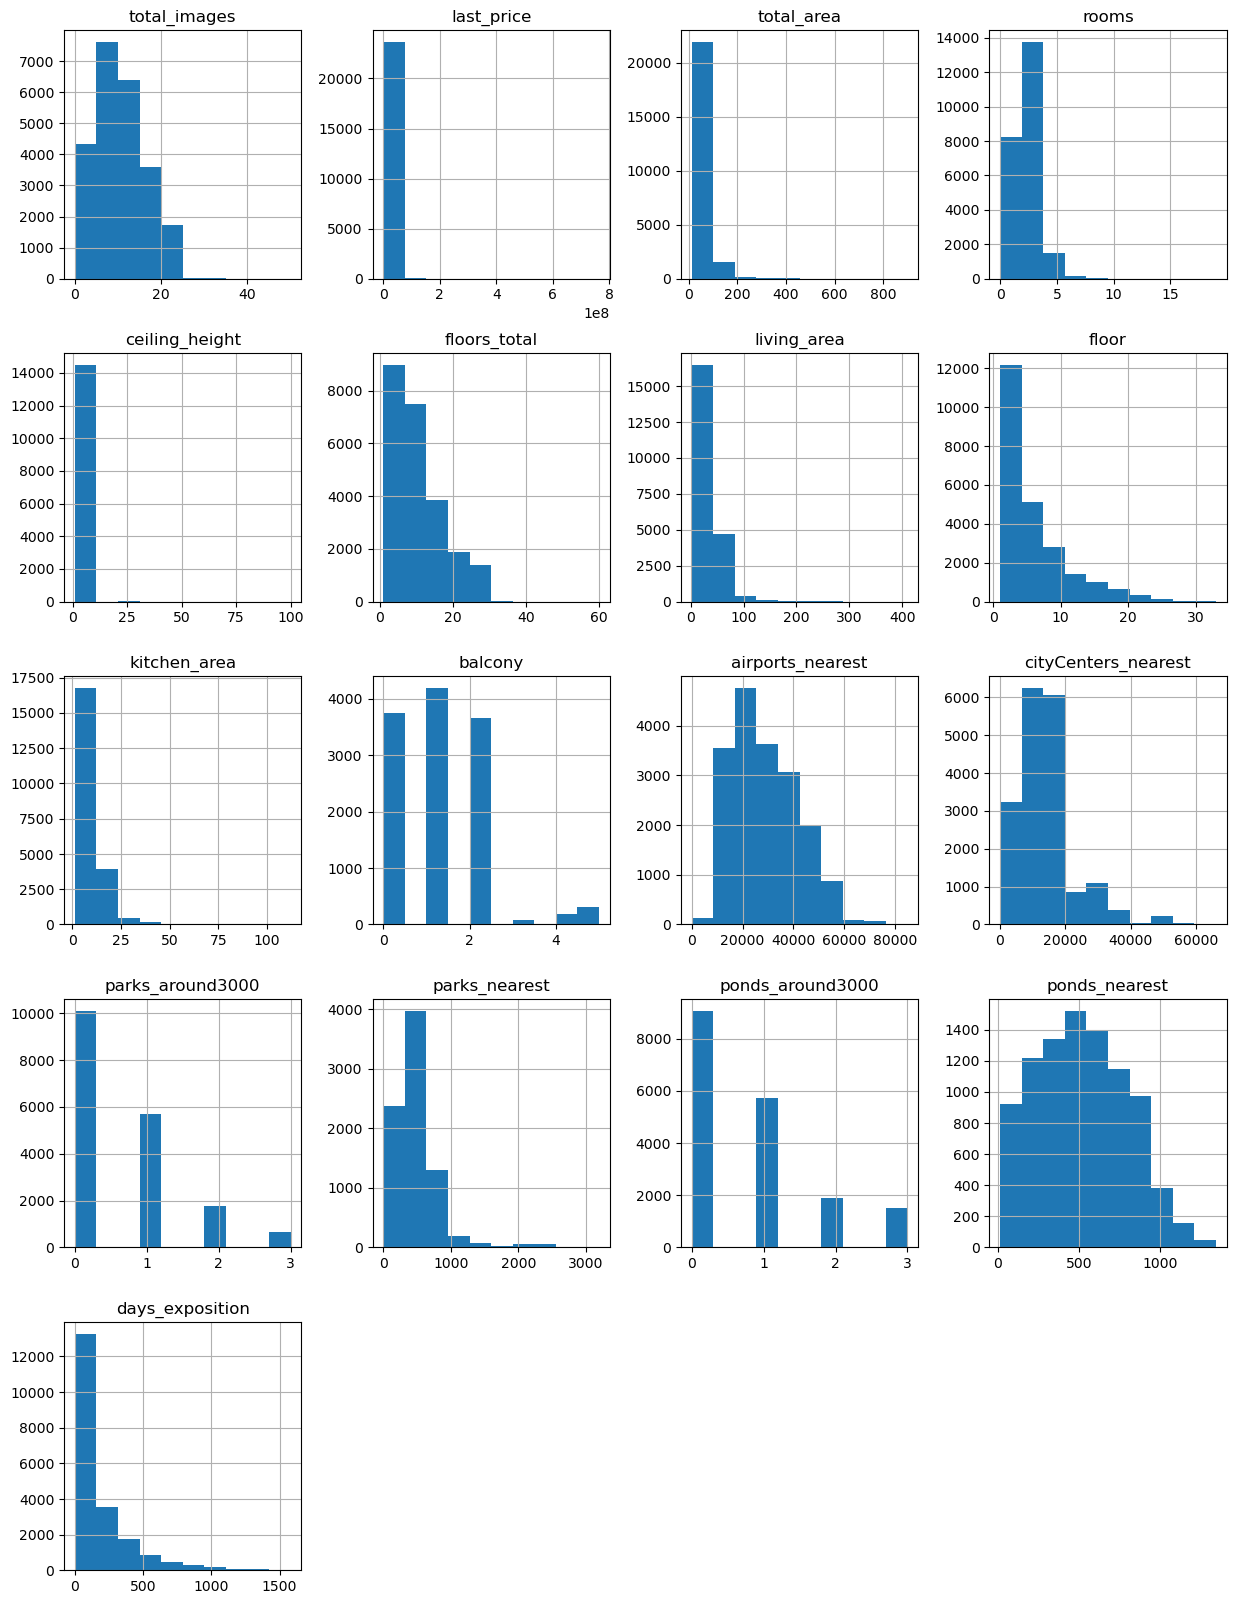

In [5]:
data_raw .hist(figsize=(15, 20));

### Вывод:
После ознакомления с таблицей можно заметить следующее:
- В таблице присутствуют пропуски в данных
- Некоторые типы данных не корректны
- Дата отображена в неудобном для чтения формате

Исправим недостатки в следущих шагах.

### Предобработка данных

#### Находим пропуски в данных, подсчитаем их количество

In [6]:
data_raw.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Очень много пропущенных значений. 
Заполним пропущенные значения там, где это возможно.

In [72]:
#заменим количество балконов т.к. если не указано их число, то их возможно нет в квартире
data_raw['balcony'] = data_raw['balcony'].fillna(0)
# если не указан тип недвижимости скорее всего владелец не знает что такое аппартаменты, а значит это не аппартаменты
data_raw['is_apartment'] = data_raw['is_apartment'].fillna(False) 
# т.к. Nan замещает числовое значение,заменименим чтобы в дальнейшем группировать 
data_raw['locality_name'] = data_raw['locality_name'].fillna('unknown')       

Остальные пока оставим как есть.\
Проверим заполнение:

In [73]:
data_raw.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

 Причины, которые могли привести к пропускам в данных: 
  - не заполнены данные типа: добавленные пользователем. Например из-за отсутствие балкона, не знаниe понятия "аппартаменты", пользователи не заполняли эти ячейки.
  - Незаполнение адреса (неверный адрес, геопозиция), приводит к отсутствию картографических данных 

#### Преобразуем тип данных в выбранных столбцах

In [9]:
data_raw['is_apartment'] = data_raw['is_apartment'].astype('bool')
data_raw['balcony'] = data_raw['balcony'].astype('int') 

Изменили тип данных чтобы в дальнейшем корректно обработать информацию.
Например не может быть 1,5 балкона в квартире, 0,5 этажа или 2,7 парка поблизости.
В столбце 'is_apartment' возможны только два значения - булев массив.

#### Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

In [74]:
data_raw['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Устраним неявные дубликаты: 
- заменим букву "ё" на "е"
- заменим названия в существующих столбцах

In [11]:
data_raw['locality_name'] = data_raw['locality_name'].str.replace('ё', 'е')
data_raw['locality_name'] = data_raw['locality_name'].str.replace('поселок городского типа', 'поселок')
data_raw['locality_name'] = data_raw['locality_name'].str.replace('городской поселок', 'поселок')

Проверим

In [12]:
data_raw['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

Найдём и устраним редкие и выбивающиеся значения. Воспользуемся методом describe, он выведет статистики для столбцов, содержащих числовые значения:

In [75]:
data_raw.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.717094,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.229594,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим очень много странных значений, например 19 комнатная квартира в 900 кв.м. или , высота потолком в 100 м.
Попробуем выяснить природу образования таких значений и заменить что возможно.

В столбце ceiling_height встречается высота потолков 100 м, 27 м и 32 м.
Логично предположить, что на самом деле это вещественные значения:10.0 м, 2.5 м и 3.2 м. Возможно есть двухуровневые квартиры с высокими потолками, однако трудно представить квартиру с высотой потолков 10.0 м и выше, но и квартир с высотой потолков 1.0 м не бывает, если предположить что это вещественное число и = 1.0. Поэтому заменим значения больше 10 на медианное значение 2,65 = 2,7 м. Также поступим с пропущенными значениями.

In [14]:
data_raw['ceiling_height'] = data_raw['ceiling_height'].fillna(2.7)

In [15]:
data_raw.loc[data_raw['ceiling_height'] > 10, 'ceiling_height'] = 2.7

In [16]:
data_raw['ceiling_height'].isna().sum() #проверим заполнение

0

### Рассмотрим значения столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне (слишком высокие). Удалим аномалии


Построим гистограмму по общей площади

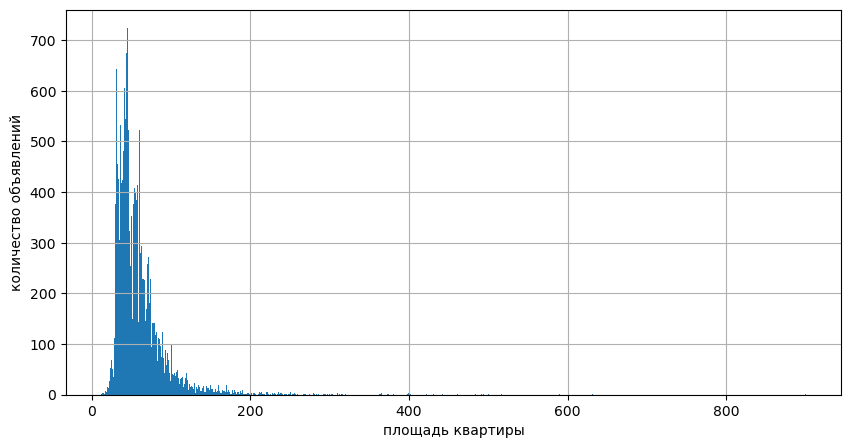

In [94]:
data_raw['total_area'].hist(bins=1000, figsize=(10, 5)).set(xlabel='площадь квартиры', ylabel='количество объявлений');

Квартиры площадью более 150 метров встречаются крайне редко, а после 200 гистограмма сливается с нулём. примем верхнюю границу в 300.

In [18]:
data = data_raw.query('total_area < 300')

Построим гистограмму по количеству комнат

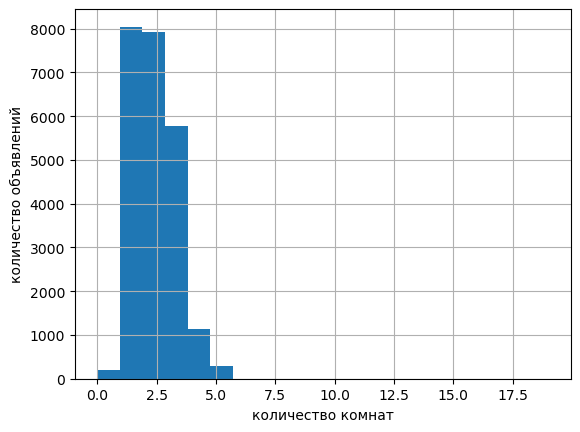

In [96]:
data['rooms'].hist(bins=20, range = (0, 19)).set(xlabel='количество комнат', ylabel='количество объявлений');

Квартиры с количество комнат 5 и более встречаются крайне редко, а после 6 гистограмма сливается с нулём. Примем верхнюю границу в 6 комнат в квартире.

In [20]:
data = data.query('rooms < 6')

Построим гистограмму по стоимости

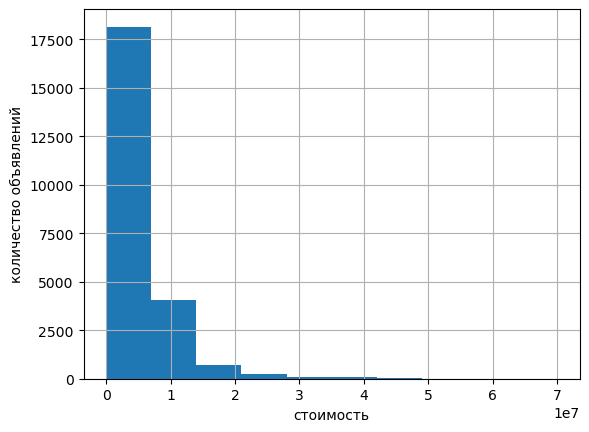

In [97]:
data['last_price'].hist(range = (0, 70000000)).set(xlabel='стоимость', ylabel='количество объявлений');

Стоимость квартир более 20 млн. встречаются крайне редко, а после 30 млн. гистограмма сливается с нулём. примем верхнюю границу в 50 млн.

In [22]:
data = data.query('last_price < 50_000_000')

In [23]:
data.shape[0] / data_raw.shape[0]

0.9870036710409722

In [24]:
data.describe() #проверим отфильтрованный датафрейм

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23391.000000,2.339100e+04,23391.000000,23391.000000,23391.000000,23306.000000,21518.000000,23391.000000,21150.000000,23391.000000,17857.000000,17878.000000,17879.000000,7857.000000,17879.000000,8887.000000,20294.000000
mean,9.835792,5.871522e+06,58.050248,2.021547,2.711495,10.729297,33.090709,5.909623,10.367444,0.594844,28847.478748,14335.783868,0.598467,493.208604,0.758767,521.264431,179.584656
std,5.667026,4.679199e+06,26.968404,0.965394,0.217866,6.612255,17.221776,4.900423,5.312124,0.961404,12703.712633,8582.396383,0.790239,343.677298,0.930297,277.843164,218.649810
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,18494.000000,9502.750000,0.000000,288.000000,0.000000,298.000000,45.000000
50%,9.000000,4.600000e+06,51.600000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,26876.000000,13188.000000,0.000000,456.000000,0.000000,505.000000,95.000000
75%,14.000000,6.650000e+06,68.400000,3.000000,2.700000,16.000000,42.000000,8.000000,11.900000,1.000000,37407.000000,16377.500000,1.000000,614.000000,1.000000,733.000000,229.000000
max,50.000000,4.990000e+07,295.000000,5.000000,8.300000,60.000000,180.000000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


# Вывод 
1. Исходя из логики мы заполнили пропущенные значения там где это возможно: пустые значения в ячейках балконы, аппартаменты, название населенного пункта.
2. Изменили аномальные значения в высоте потолков на медианное значение, таким же заполнили пропуски.
3. Устраним редкие и выбивающиеся значения
4. Устранили неявные дубликаты в названиях населенных пунктов
5. Оставили пустые значения в картографических данных которые не можем обработать.



### Посчитаем и добавим в таблицу новые столбцы

In [25]:
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


 Для того чтобы проще воспринимать данные переведём строки в даты.

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').dt.round('1H')

In [27]:
data['first_day_exposition'].head(1) #проверим

0   2019-03-07
Name: first_day_exposition, dtype: datetime64[ns]

#### Добавим в таблицу новые столбцы:

- Цена одного квадратного метра

In [28]:
data['price_m2'] = round(data['last_price'] / data['total_area'], 2) #округлим до двух знаков после запятой

- День недели, месяц, год  публикации объявления 


In [29]:
data['day_of_week_exp'] = data['first_day_exposition'].dt.weekday

0 - понедельник \
1 - вторник \
2 - среда \
3 - четверг \
4 - пятница \
5 - суббота \
6 - воскресенье

In [30]:
data['month_exp'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [31]:
data['year_exp'] = pd.DatetimeIndex(data['first_day_exposition']).year

- Тип этажа квартиры (значения — «первый», «последний», «другой»)

In [32]:
def type_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

data['type_floor'] = data.apply(type_floor, axis=1)
    

In [33]:
data['type_floor'].value_counts()

другой       17242
последний     3256
первый        2893
Name: type_floor, dtype: int64

- Расстояние до центра города в километрах 

Переведем расстояние из метров в км, для этого заменим пропуски в столбце 'cityCenters_nearest' средним значением для каждого населенного пункта:

Переведем расстояние из метров в км и округлим до целых

In [35]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)


In [36]:
data.head(1) #проверим

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,day_of_week_exp,month_exp,year_exp,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0


### Вывод
На этом этапе мы проделали следующую работу:
1. Изменили формат даты для удобства восприятия
 
 
2. Добавили новые столбцы:
- цена одного квадратного метра
- день недели, месяц, год  публикации объявления 
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах
 

### Проведите исследовательский анализ данных

#### Изучим следующие параметры объектов 
Построим отдельные гистограммы для каждого из следущих параметров:

- общая площадь

Text(0, 0.5, 'колличество объявлений')

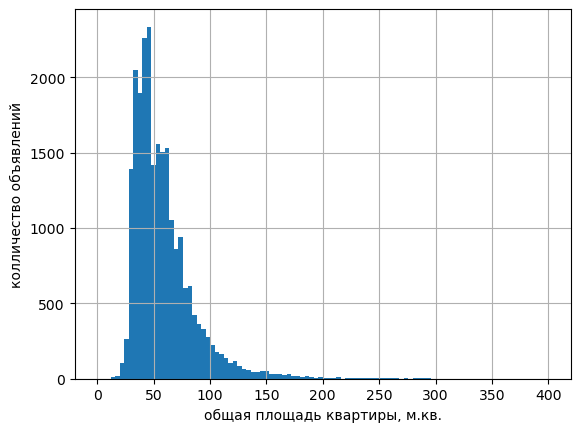

In [37]:
ax = data['total_area'].hist(bins=100, range = (0, 400))
ax.set_xlabel('общая площадь квартиры, м.кв.')
ax.set_ylabel('колличество объявлений')

На гистограмме можно увидеть что больше всего квартир от 25-40 кв.м. Есть квартиры 200 и более их мало.

- жилая площадь

Text(0, 0.5, 'колличество объявлений')

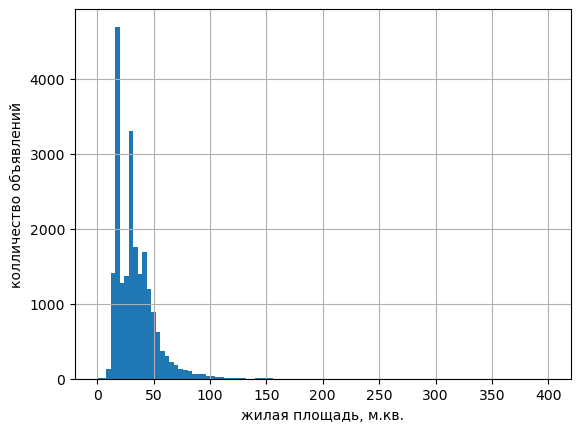

In [38]:
ax = data['living_area'].hist(bins=100, range = (0, 400))
ax.set_xlabel('жилая площадь, м.кв.')
ax.set_ylabel('колличество объявлений')

Здесь видно что основная масса объявлений с 20 кв.м. жилой площади 

- площадь кухни


Text(0, 0.5, 'колличество объявлений')

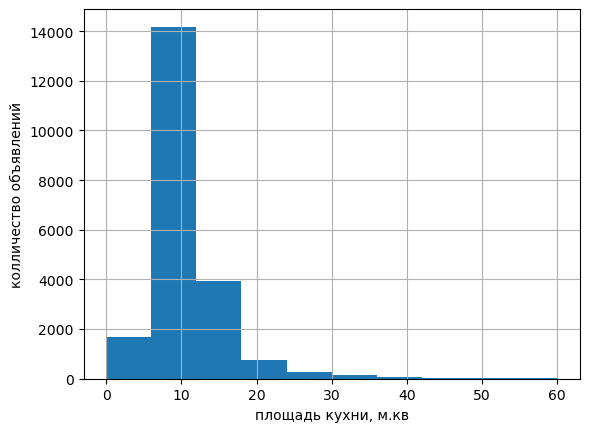

In [39]:
ax = data['kitchen_area'].hist(range = (0, 60))
ax.set_xlabel('площадь кухни, м.кв')
ax.set_ylabel('колличество объявлений')

Больше всего квартир с кухней от 6 до 12 кв.м.

- цена объекта

Text(0, 0.5, 'колличество объявлений')

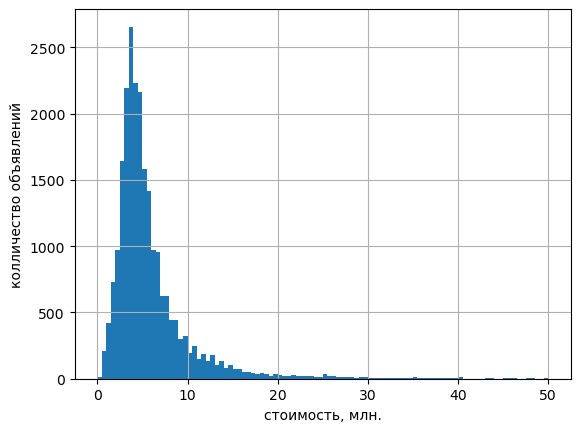

In [40]:
ax = (data['last_price']/1000000).hist(bins=100, range = (0, 50))
ax.set_xlabel('стоимость, млн.')
ax.set_ylabel('колличество объявлений')

Больше всего квартир стоимостью около 5 млн. 

- количество комнат

Text(0, 0.5, 'колличество объявлений')

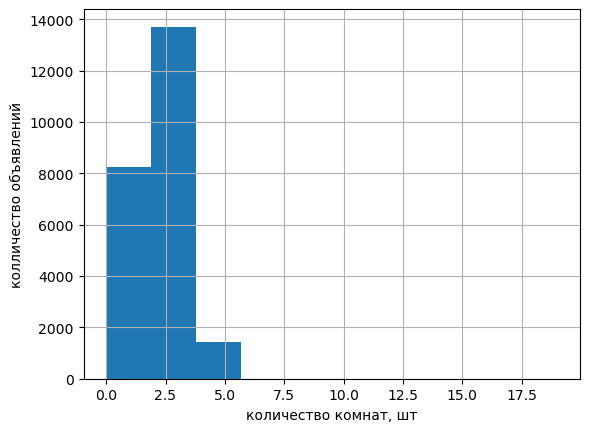

In [41]:
ax = data['rooms'].hist(range = (0, 19))
ax.set_xlabel('количество комнат, шт')
ax.set_ylabel('колличество объявлений')

Больше всего 2 и 3-х комнатных квартир, остальные в основном студии и однакомнатные 

Text(0, 0.5, 'колличество объявлений')

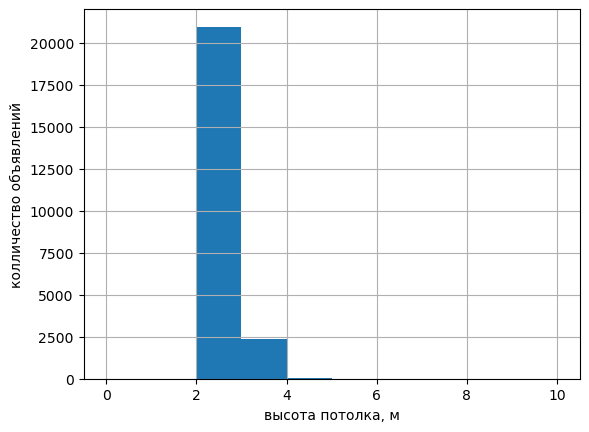

In [42]:
ax = data['ceiling_height'].hist(range = (0, 10))
ax.set_xlabel('высота потолка, м')
ax.set_ylabel('колличество объявлений')

Больше всего квартир с высотой потолков 2-3 м.

- этаж квартиры

Text(0, 0.5, 'колличество объявлений')

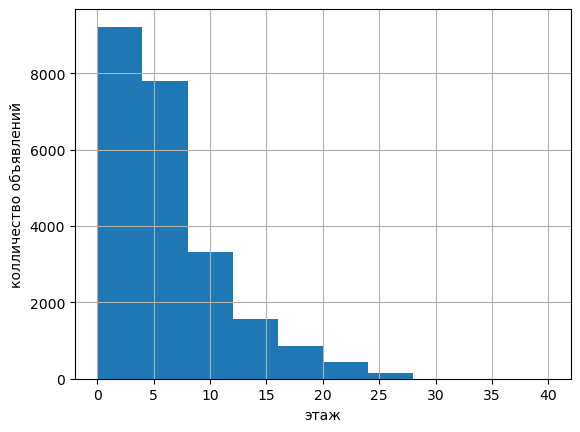

In [43]:
ax = data['floor'].hist(range = (0, 40))
ax.set_xlabel('этаж')
ax.set_ylabel('колличество объявлений')

Всех больше квартр расположено с 1 - 4 этаж, далее 4 -8. Можно сделать вывод что больше всего на рынке недвижимости 5 и 9 этажек.

- тип этажа квартиры («первый», «последний», «другой») 

Text(0, 0.5, 'колличество объявлений')

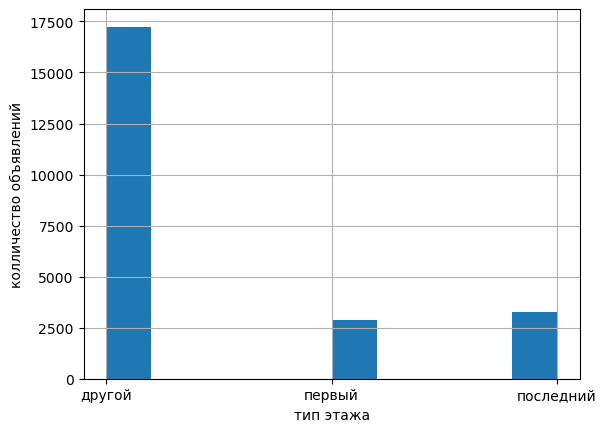

In [44]:
ax = data['type_floor'].hist()
ax.set_xlabel('тип этажа')
ax.set_ylabel('колличество объявлений')

Естественно подовляющее количество квартир находится между первым и последним этажами. На первом продаж меньше, что скорее всего обусловленно наличием коммерческой недвижимости (магазины и т.д.) на первых этажах домов.

- общее количество этажей в доме

Text(0, 0.5, 'колличество объявлений')

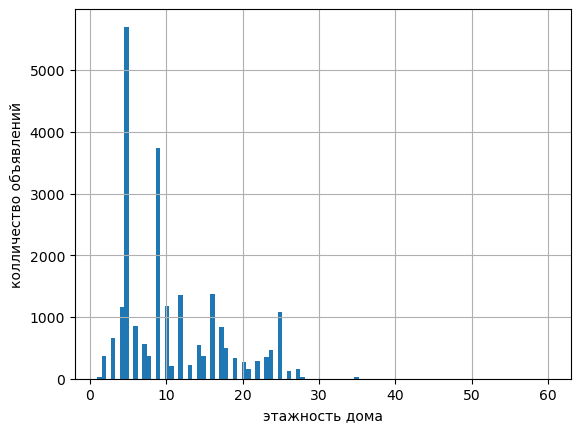

In [45]:
ax = data['floors_total'].hist(bins=100)
ax.set_xlabel('этажность дома')
ax.set_ylabel('колличество объявлений')

Подтверждается вывод сделанный ранее. Больше всего на рынке 5-ти этаже и 9-ти этажных домов.(насдедие советской массовой застройки)

- расстояние до центра города в метрах

Text(0, 0.5, 'колличество объявлений')

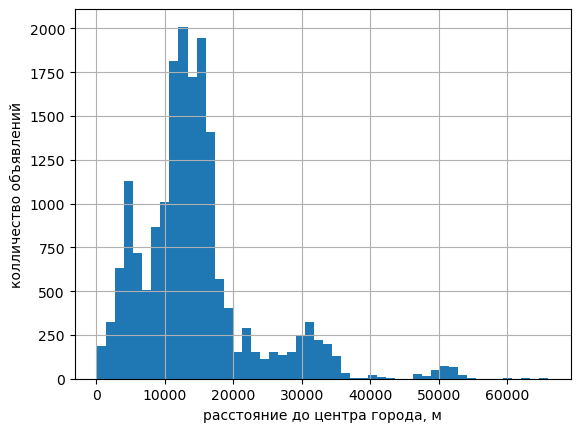

In [46]:
ax = data['cityCenters_nearest'].hist(bins=50)
ax.set_xlabel('расстояние до центра города, м')
ax.set_ylabel('колличество объявлений')

Основная масса объявлений в 11 - 15 км от центра, можно сделать вывод что цетральные районы Санкт-Петербурга наиболее активны по сделкам недвижимости

- расстояние до ближайшего аэропорта

Text(0, 0.5, 'колличество объявлений')

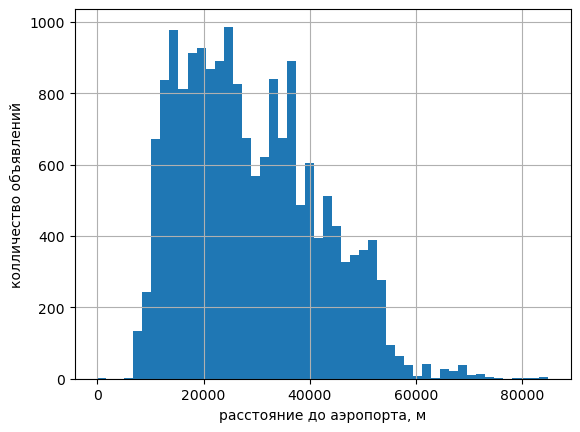

In [47]:
ax = data['airports_nearest'].hist(bins=50)
ax.set_xlabel('расстояние до аэропорта, м')
ax.set_ylabel('колличество объявлений')

Почти нет квартир ближе 10 км, что объяснимо удалением аэропорта от населенных пунктов

- расстояние до ближайшего парка

Text(0, 0.5, 'колличество объявлений')

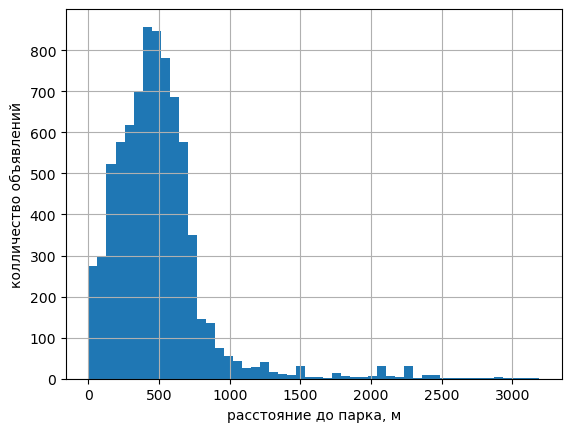

In [48]:
ax = data['parks_nearest'].hist(bins=50)
ax.set_xlabel('расстояние до парка, м')
ax.set_ylabel('колличество объявлений')

Оказывается с парками не все так плохо в Санкт-Петербурге, зеленый город

- день и месяц публикации объявления

Text(0, 0.5, 'колличество объявлений')

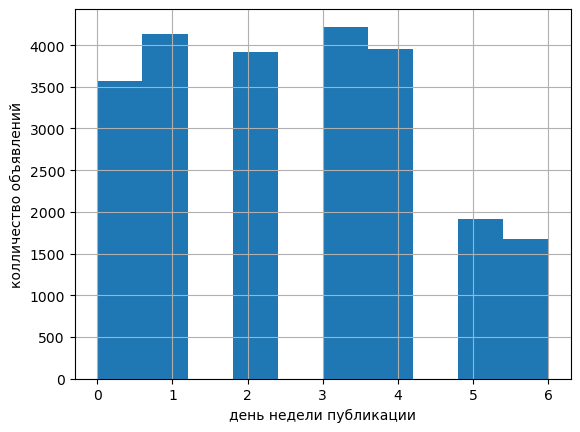

In [49]:
ax = data['day_of_week_exp'].hist(range = (0, 6))
ax.set_xlabel('день недели публикации')
ax.set_ylabel('колличество объявлений')

В выходные надо отдыхать.. Активность по размещению объявлений снижается в сб и вс.

Text(0, 0.5, 'колличество объявлений')

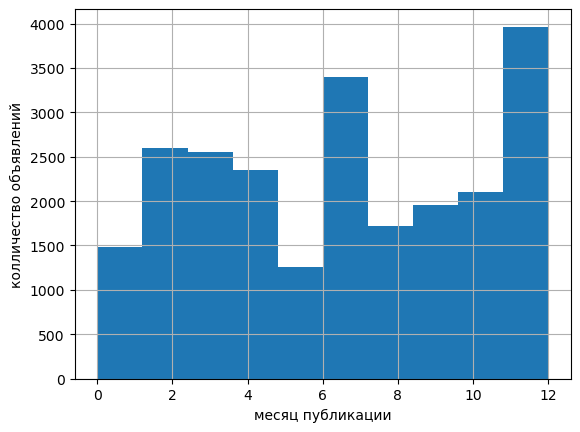

In [50]:
ax = data['month_exp'].hist(range = (0, 12))
ax.set_xlabel('месяц публикации')
ax.set_ylabel('колличество объявлений')

К концу года люди мечтают о новом доме, и количество объявлений увеличивается. После активность снижается, а в начале лета заново

#### Изучим, как быстро продавались квартиры

Text(0, 0.5, 'колличество объявлений')

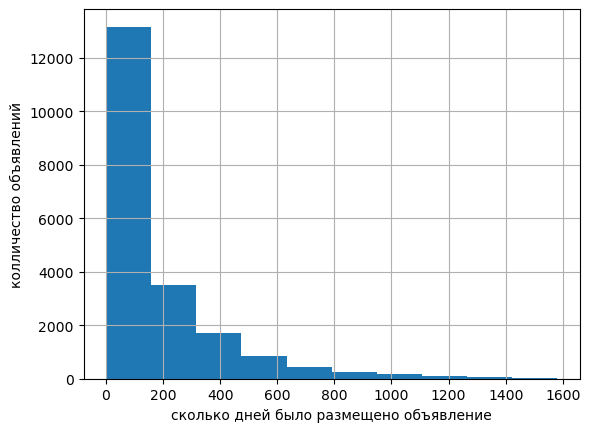

In [51]:
ax = data['days_exposition'].hist()
ax.set_xlabel('сколько дней было размещено объявление')
ax.set_ylabel('колличество объявлений')

В основном все квартиры продаются в первые 100 дней, рассмотрим их детальнее

Рассмотрим внимательнее диапозон от 0 до 100 

Text(0, 0.5, 'колличество объявлений')

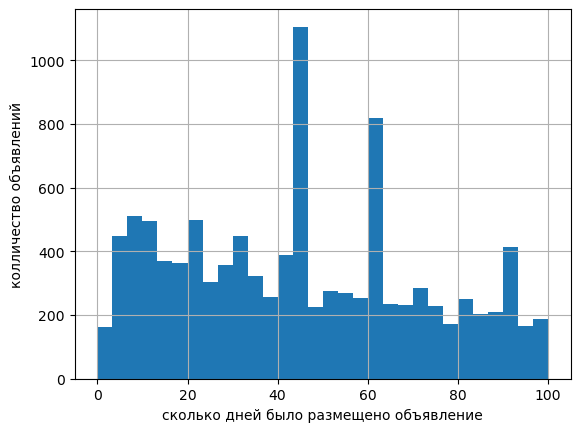

In [52]:
data_100d = data.query('days_exposition < 100')
ax = data_100d['days_exposition'].hist(bins = 30, range = (0, 100));
ax.set_xlabel('сколько дней было размещено объявление')
ax.set_ylabel('колличество объявлений')

На гистограмме видим несколько пиков после 1,5 , 2 и 3 месяцев размещения, можно предположить что они вызваны снижением цены на продаваемую недвижимость и/или использованием платной опции повышающей объявление в списке.

In [53]:
data['days_exposition'].describe()

count    20294.000000
mean       179.584656
std        218.649810
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

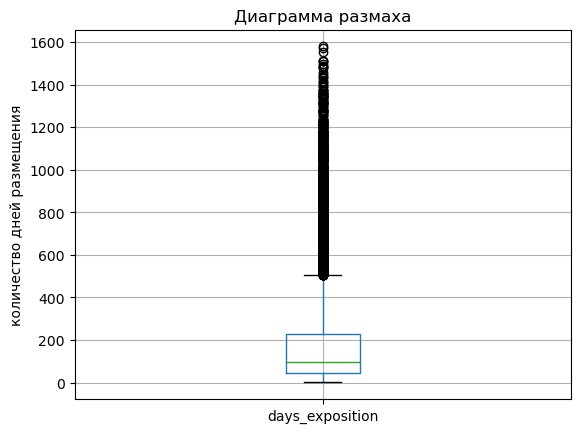

In [100]:
data.boxplot('days_exposition').set(
    title='Диаграмма размаха', 
     ylabel='количество дней размещения');

Согласно гистограммы в среднем квартиры продаются около 100 дней, это видно и из медианы равной 95. Но среднее в 180 дней говорит о наличие невероятно долгих продаж. По диаграмме размаха видно что значения более 500 дней необычно долгие и их можно считать выбросами, а менее 50 необычно быстрыми.

#### Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта
Изучим, зависит ли цена от

- общей площади

Построим графики зависимости

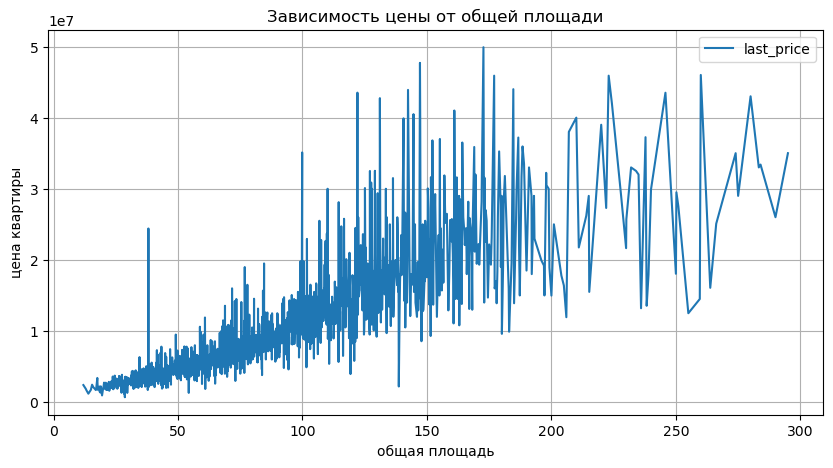

In [55]:
data.pivot_table(index='total_area', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от общей площади', \
                                            xlabel='общая площадь', ylabel='цена квартиры');


Чем больше площадь, тем больше цена

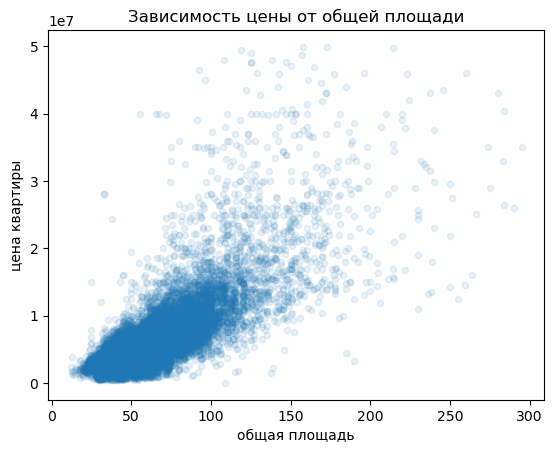

In [56]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, title='Зависимость цены от общей площади', \
                                            xlabel='общая площадь', ylabel='цена квартиры'); 

Вычислим коэффициент корреляции

In [57]:
data['last_price'].corr(data['total_area'])

0.7740056248010145

Видим зависимость, это логично чем больше площадь тем больше цена на квартиру

Далее построим графики для поиска интересующих нас зависимостей. В конце составим общую матрицу корреляций для всех пар столбцов (кроме этажа).

- жилой площади

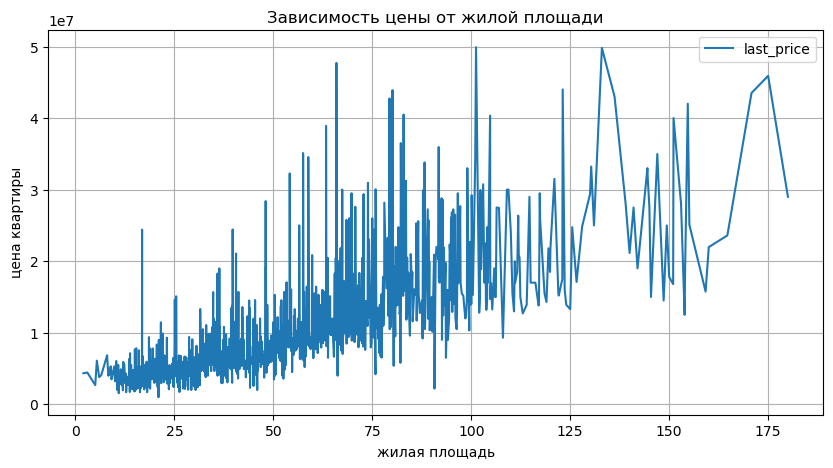

In [58]:
data.pivot_table(index='living_area', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от жилой площади', \
                                            xlabel='жилая площадь', ylabel='цена квартиры');

Так же как и с общей площадью цена уыеличивается с увеличением жилой.

- площади кухни

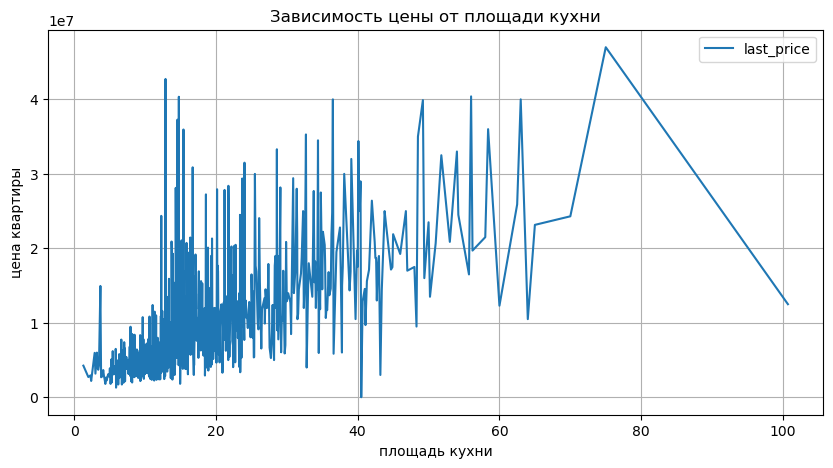

In [59]:
data.pivot_table(index='kitchen_area', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от площади кухни', \
                                            xlabel='площадь кухни', ylabel='цена квартиры');

Небольшая зависимость: при увеличение площади увеличивается цена

- количества комнат 

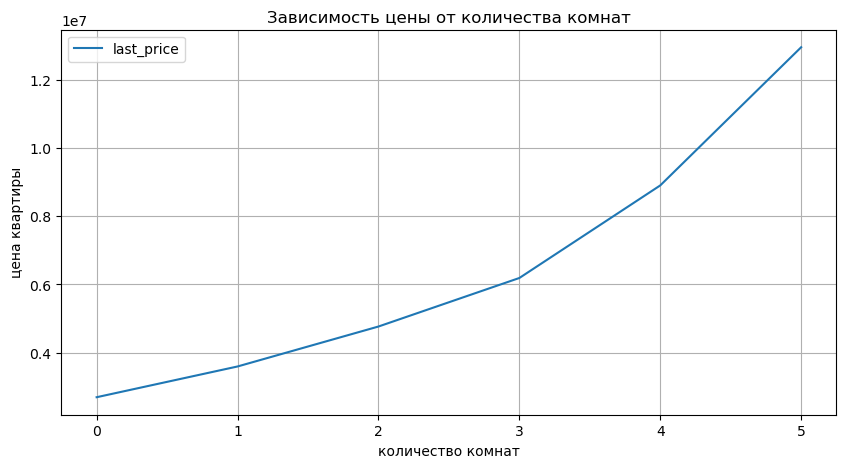

In [60]:
data.pivot_table(index='rooms', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от количества комнат', \
                                            xlabel='количество комнат', ylabel='цена квартиры');

Чем больше комнат, тем выше цена. Логично.

- этажа, на котором расположена квартира (первый, последний, другой)

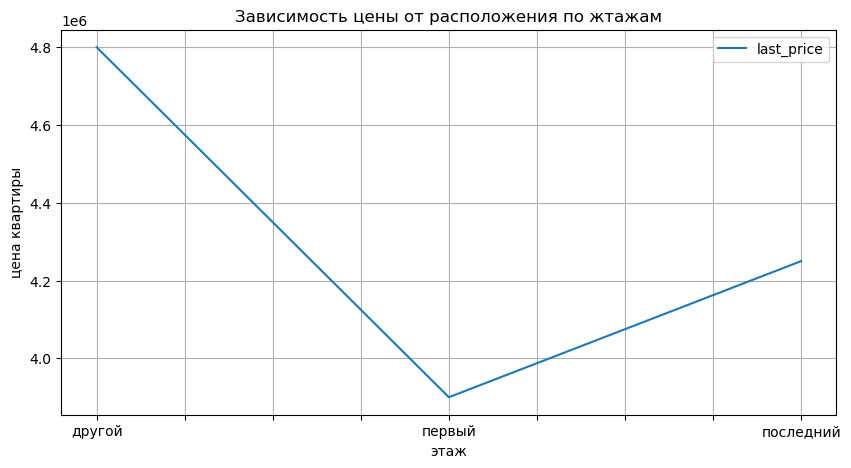

In [61]:
data.pivot_table(index='type_floor', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от расположения по жтажам', \
                                            xlabel='этаж', ylabel='цена квартиры');

Квартиры на первых и последних этажах дешевле чем на промежуточных. Цена на первый самая маленькая.

- даты размещения (день)

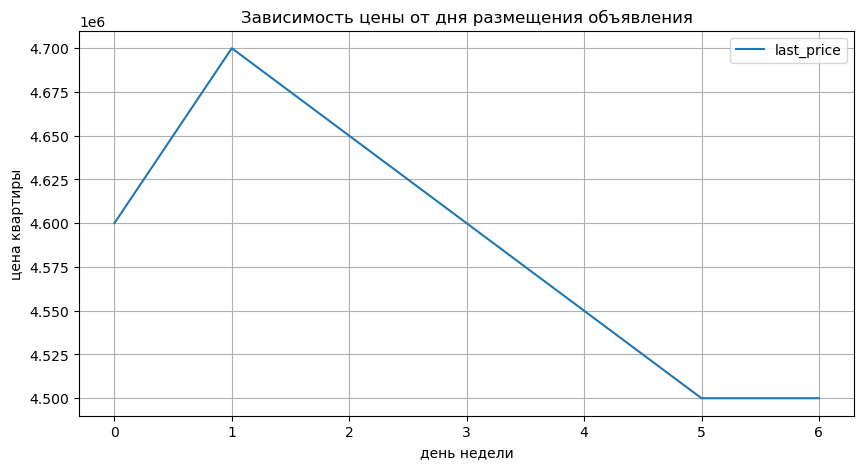

In [62]:
data.pivot_table(index='day_of_week_exp', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от дня размещения объявления', \
                                            xlabel='день недели', ylabel='цена квартиры');

Кажется к выходным люди оценивают свое жильё меньше. 

- даты размещения (месяц)

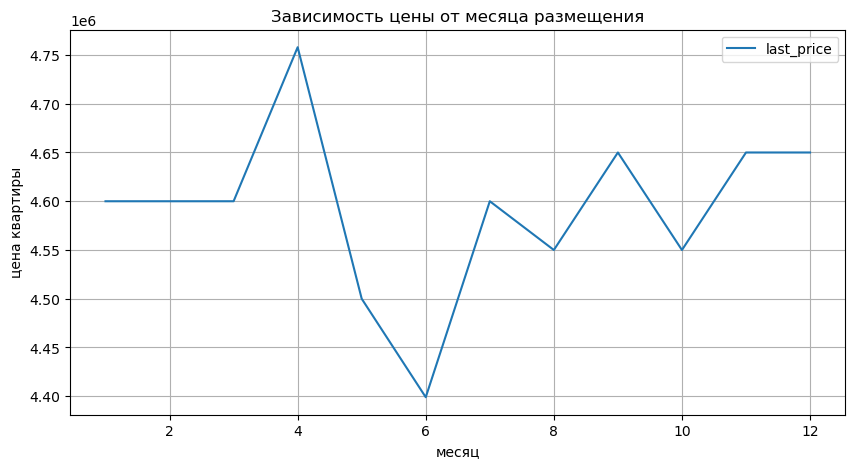

In [63]:
data.pivot_table(index='month_exp', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от месяца размещения', \
                                            xlabel='месяц', ylabel='цена квартиры');

В середине года квартиры продают по самым выгодным ценам.  

- даты размещения (год)

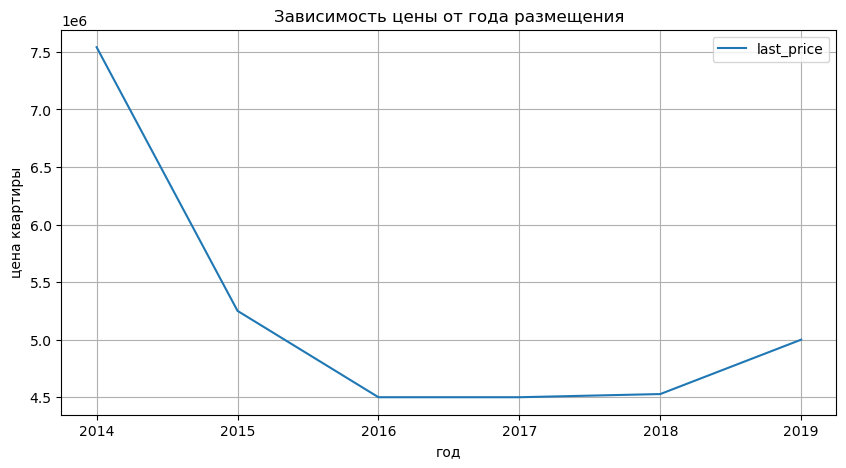

In [64]:
data.pivot_table(index='year_exp', \
values='last_price', aggfunc='median').plot(grid=True, figsize=(10, 5), title='Зависимость цены от года размещения', \
                                            xlabel='год', ylabel='цена квартиры');

Судя по графику на рынке недвижимости после 14 года был спад и цена отреагировала понижением, после 18 кривая поползла наверх

Для составления матрицы корреляций сформируем новую таблицу из интересующих нас столбцов:

In [65]:
corr_data = data[['last_price', 'living_area', 'total_area', \
                  'kitchen_area', 'rooms']] 
           

Составим матрицу корреляций для всех пар столбцов 

In [66]:
corr_data.corr()

,last_price,living_area,total_area,kitchen_area,rooms
last_price,1.000000,0.663255,0.774006,0.591340,0.465688
living_area,0.663255,1.000000,0.922827,0.338818,0.860090
total_area,0.774006,0.922827,1.000000,0.573848,0.769342
kitchen_area,0.591340,0.338818,0.573848,1.000000,0.196156
rooms,0.465688,0.860090,0.769342,0.196156,1.000000


Наглядно видно что цена на квартиру больше всего  зависит от общей площади квартиры и площади помещений в её составе, есть небольшая зависимость от количества комнат. 

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [67]:
city_10 = data.pivot_table(index='locality_name', \
values='price_m2', aggfunc=['count', 'mean']) #сгруппируем по населенному пункту и цене за квадрат

In [68]:
city_10.columns = ('количество_объявлений','средняя_цена') #переименуем столбцы в нашей сводной таблице

In [69]:
city_10.sort_values('количество_объявлений', ascending=False).head(10) #отсортируем по убыванию

,количество_объявлений,средняя_цена
locality_name,,
Санкт-Петербург,15422,112218.741802
поселок Мурино,556,85681.762572
поселок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,366,103221.059235
Колпино,337,75333.295816
поселок Парголово,326,90332.262638
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


Построим барплот для топ-10

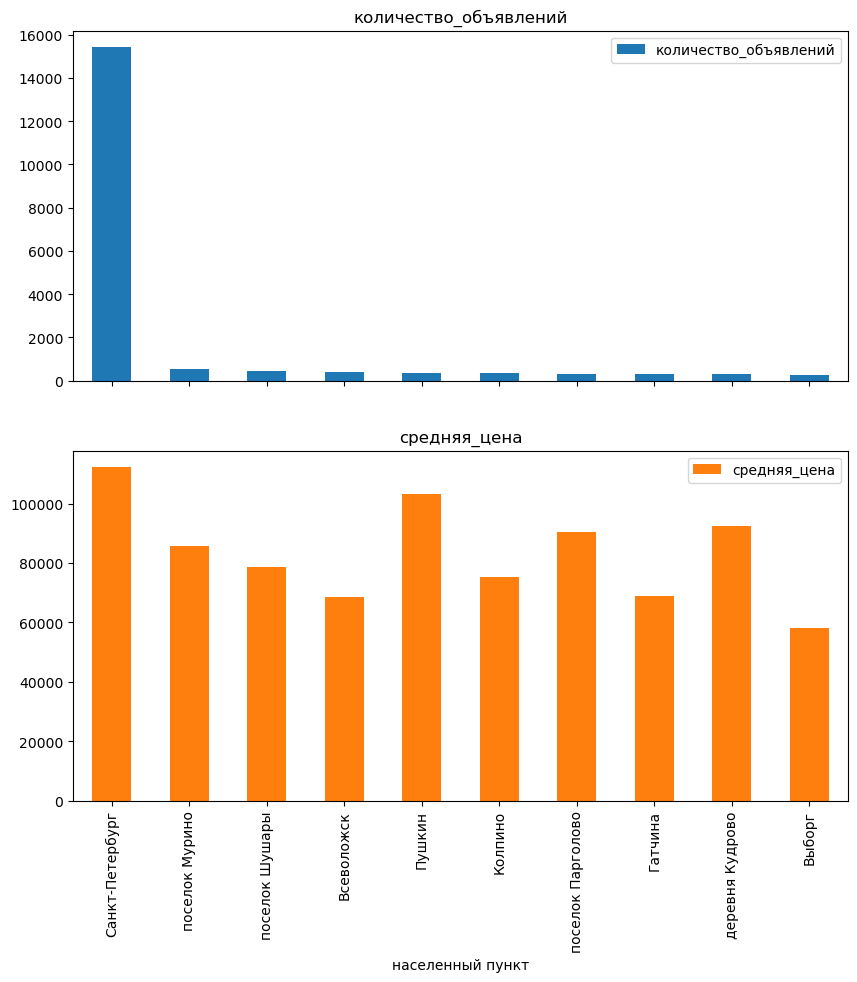

In [70]:
city_10.sort_values('количество_объявлений', ascending=False).head(10).plot.bar(subplots=True, figsize=(10, 10), \
                                                                xlabel='населенный пункт');

В Санкт-Петербурге самое большое количество объявлений и самая большая цена за кв.м. Обратная ситуация в Выборге.

#### Вычислим среднюю цену каждого километра в Санкт-Петербурге

Создадим сводную таблицу:

In [71]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', \
                                                                 values='last_price', aggfunc=['median'])

,median
,last_price
cityCenters_nearest_km,
0.0,13500000.0
1.0,10000000.0
2.0,9500000.0
3.0,8200000.0
4.0,8831000.0
5.0,8971000.0
6.0,8500000.0
7.0,7300000.0


Что и требовалось доказать: чем дальше от центра СПб тем дешевле квартиры. Локальные повышения цен на квартиры на определенных километрах можно объяснить расположением крупных городов в ЛО на этих километрах.

### Общий вывод

Мы провели исследование объявлений о продаже квартир.

В ходе предобработки данных были заполнены пропущенные значения там где это возможно сделать логически.
Изменены аномальные значения допущенные при заполнение данных пользователем, устранены редкие и выбивающиеся значения
для верной обработки и корректных выводах, так же устранены неявные дубликаты в названиях населенных пунктов. Пропуски в картографических данных оставлены без изменений.  
Добавили новые столбцы с необходимой для исследования информацией: \
•	цена одного квадратного метра \
•	день недели, месяц, год публикации объявления \
•	тип этажа квартиры (значения — «первый», «последний», «другой») \
•	расстояние до центра города в километрах 


При исследовательском анализе данных выяснили какие факторы больше всего влияют на общую (полную) стоимость объекта. \
На рынке продажи недвижимости больше всего 2-х 3-х комнатных квартир площадью 50 кв.м. стоимость 5 млн. с кухней 6-12 квадратов и высотой потолков от 2-3 метров. В основном квартиры расположены с 1-8 этаж. 
 Больше продаваемой недвижимости находится в Санкт-петербурге на удаление 11 -15 км от центра. Квартиры продаются в первые 100 дней размещения с пиками продаж на 45 и 60 день после размещения.   
 Цена на квартиру прямо  зависит от удаления от центра СПб(чем дальше от центра СПб тем дешевле квартиры) и общей площади квартиры и помещений в её составе, есть небольшая зависимость от количества комнат. Существовало падение цен на рынке на отрезке 2014-18 годов. Квартиры на первом этаже дешевле чем на остальных. Цена не зависит от дня недели и месяца публикации. \
 В Санкт-Петербурге самое большое количество объявлений и самая большая цена за кв.м. Обратная ситуация в Выборге.

